In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import seaborn as sns

import pickle
from utils_ens import get_Xy_tt
from sklearn import metrics



In [2]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/rf_reg_hp_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/rf_reg_hp_df.pkl', 'rb')
rf_hp_df = pickle.load(pkl_file)
pkl_file.close()


In [3]:
# buttom five
rf_hp_df.sort_values('MSE')[:5]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,test_preds_con,test_preds_prob,MSE,MAE,AP,PR,ROC
38,133,10,11,35,mse,auto,"[7.932510204100176e-07, 7.932510204100176e-07,...","[0.5000001983127551, 0.5000001983127551, 0.500...",0.015557,0.007389,0.197228,"([0.003059536074427898, 0.0030523108308894895,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694..."
29,145,10,9,81,mse,log2,"[7.048319648110054e-07, 7.048319648110054e-07,...","[0.5000001762079912, 0.5000001762079912, 0.500...",0.015572,0.007140,0.203742,"([0.003059607714582309, 0.02256175197351668, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694..."
0,135,9,2,136,mse,sqrt,"[1.4079911738936237e-06, 1.4079911738936237e-0...","[0.5000003519977935, 0.5000003519977935, 0.500...",0.015574,0.007019,0.207366,"([0.003059631595379332, 0.003050049966688874, ...","([0.0, 0.0, 0.0, 0.0, 2.609630580694997e-06, 2..."
46,103,9,6,85,mse,sqrt,"[1.450983055854662e-06, 1.450983055854662e-06,...","[0.500000362745764, 0.500000362745764, 0.50000...",0.015575,0.007075,0.204440,"([0.003059536074427898, 0.02256175197351668, 0...","([0.0, 0.0, 0.0, 2.609630580694997e-06, 2.6096..."
28,148,10,13,47,mse,log2,"[8.684942278155467e-07, 8.684942278155467e-07,...","[0.5000002171235569, 0.5000002171235569, 0.500...",0.015576,0.007229,0.199237,"([0.003059536074427898, 0.0030523108308894895,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [4]:
# top five
rf_hp_df.sort_values('MSE', ascending= False)[:5]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,test_preds_con,test_preds_prob,MSE,MAE,AP,PR,ROC
23,105,5,11,195,mse,auto,"[1.2484283027399495e-05, 1.2484283027399495e-0...","[0.5000031210707568, 0.5000031210707568, 0.500...",0.015968,0.006909,0.194942,"([0.003059536074427898, 0.04450966006358523, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
26,121,5,13,179,mse,log2,"[1.2661316396413448e-05, 1.2661316396413448e-0...","[0.500003165329099, 0.500003165329099, 0.50000...",0.015861,0.006890,0.195938,"([0.003059536074427898, 0.04450966006358523, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694..."
27,147,7,11,197,mse,sqrt,"[3.830268427656592e-06, 3.830268427656592e-06,...","[0.5000009575671069, 0.5000009575671069, 0.500...",0.015846,0.006914,0.207671,"([0.003059536074427898, 0.022572151639868095, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,106,5,4,12,mse,log2,"[2.11731647905188e-05, 2.11731647905188e-05, 2...","[0.5000052932911975, 0.5000052932911975, 0.500...",0.015842,0.006912,0.193000,"([0.003059536074427898, 0.0409041394335512, 0....","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
22,108,8,2,193,mse,sqrt,"[2.2083703948011147e-06, 2.2083703948011147e-0...","[0.5000005520925987, 0.5000005520925987, 0.500...",0.015834,0.006998,0.207402,"([0.003059607714582309, 0.02256175197351668, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


0.2028533305695743


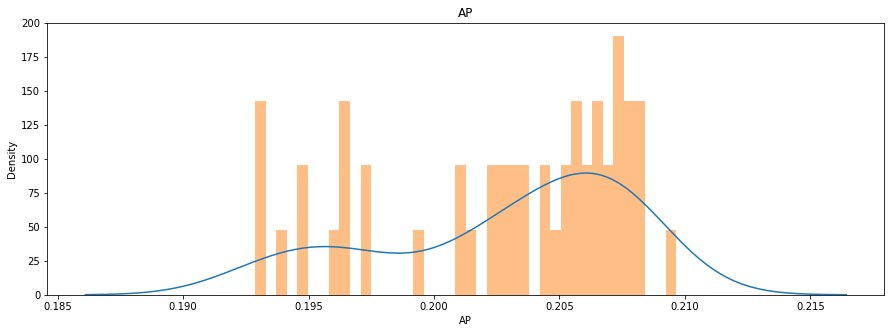

0.015680855301537244
/home/simon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


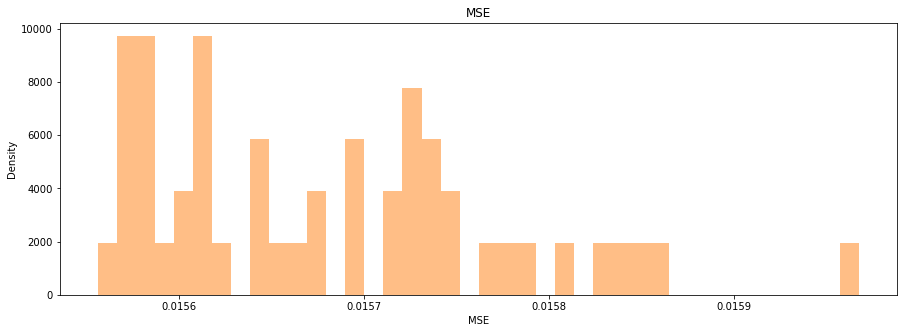

0.006970597696318453


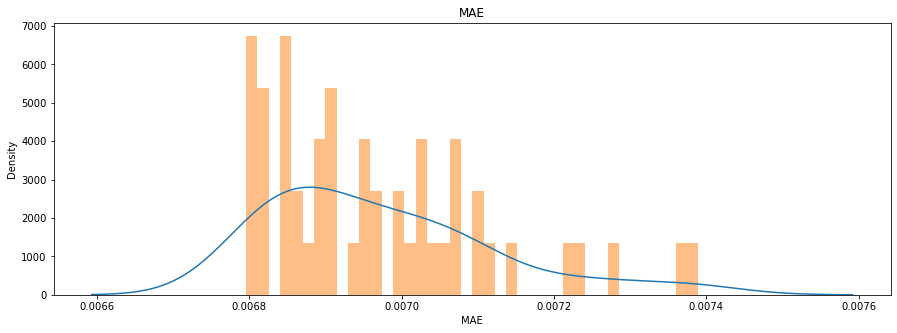

In [5]:
print(rf_hp_df['AP'].mean())
plt.figure(figsize = [15,5])
plt.title('AP')
plt.hist(rf_hp_df['AP'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['AP'])
plt.show()

print(rf_hp_df['MSE'].mean())
plt.figure(figsize = [15,5])
plt.title('MSE')
plt.hist(rf_hp_df['MSE'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['MSE'])
plt.show()

print(rf_hp_df['MAE'].mean())
plt.figure(figsize = [15,5])
plt.title('MAE')
plt.hist(rf_hp_df['MAE'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['MAE'])
plt.show()

0.18956753134216003


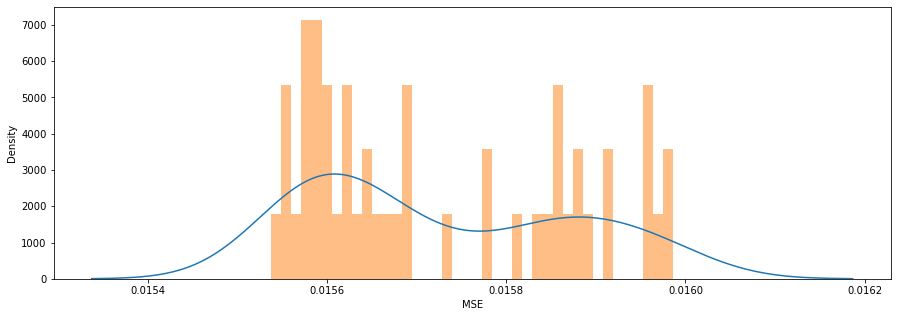

In [6]:
rf_hp_df.columns

Index(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
       'criterion', 'max_features', 'test_preds_con', 'test_preds_prob', 'MSE',
       'MAE', 'AP', 'PR', 'ROC'],
      dtype='object')

n_estimators
max_depth
min_samples_split
min_samples_leaf


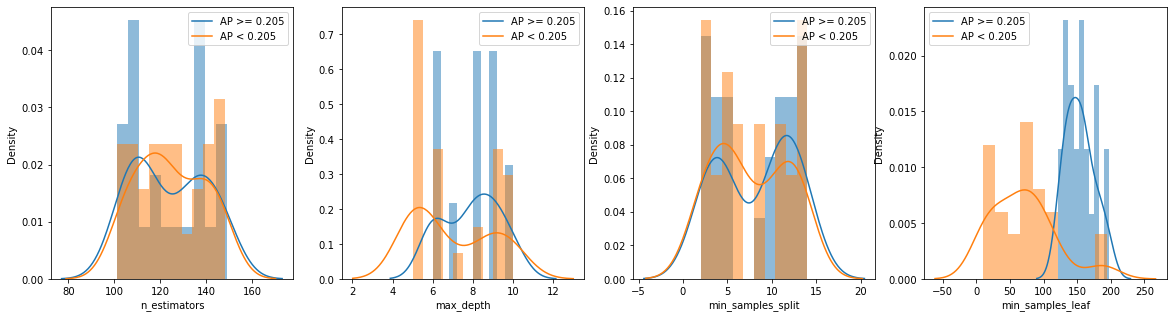

In [16]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.205

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['AP'] >= threshold][j], label = f'AP >= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['AP'] < threshold][j], label = f'AP < {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['AP'] >= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['AP'] < threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


n_estimators
max_depth
min_samples_split
min_samples_leaf


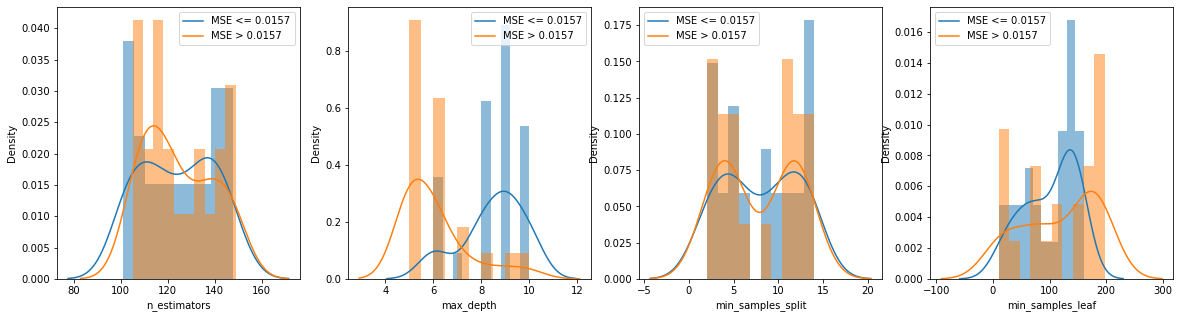

In [23]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.0157

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['MSE'] <= threshold][j], label = f'MSE <= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['MSE'] > threshold][j], label = f'MSE > {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['MSE'] <= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['MSE'] > threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


n_estimators
max_depth
min_samples_split
min_samples_leaf


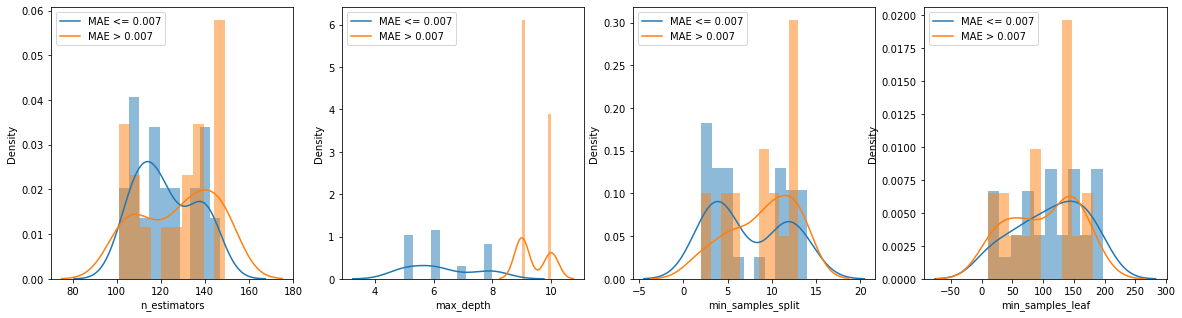

In [9]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.007

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['MAE'] <= threshold][j], label = f'MAE <= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['MAE'] > threshold][j], label = f'MAE > {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['MAE'] <= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['MAE'] > threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


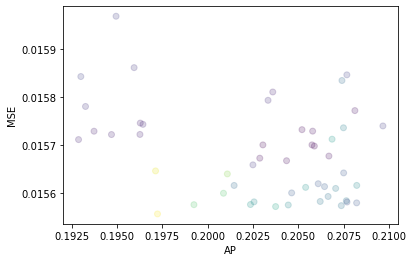

In [10]:
#I have looked at hte other parameters and there does not appear to be a relationship

plt.scatter(rf_hp_df['AP'], rf_hp_df['MSE'], c= rf_hp_df['MAE'], alpha = 0.2)
plt.xlabel('AP')
plt.ylabel('MSE')

#x_grid = np.arange(0.1,1.1,0.1)
#y_grid = x_grid * 0.52
#plt.plot(x_grid, y_grid)

plt.show()

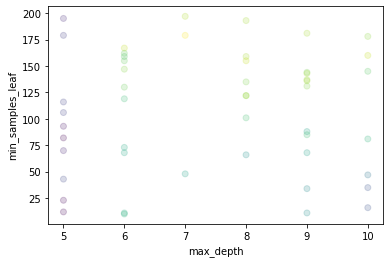

In [11]:

plt.scatter(rf_hp_df['max_depth'], rf_hp_df['min_samples_leaf'], c= rf_hp_df['AP'], alpha = 0.2)
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')

# x_grid = np.arange(0.1,1.1,0.1)
# y_grid = x_grid * 0.52
# plt.plot(x_grid, y_grid)

plt.show()

In [12]:
#Puhu so you need a undersampling ensample...

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)


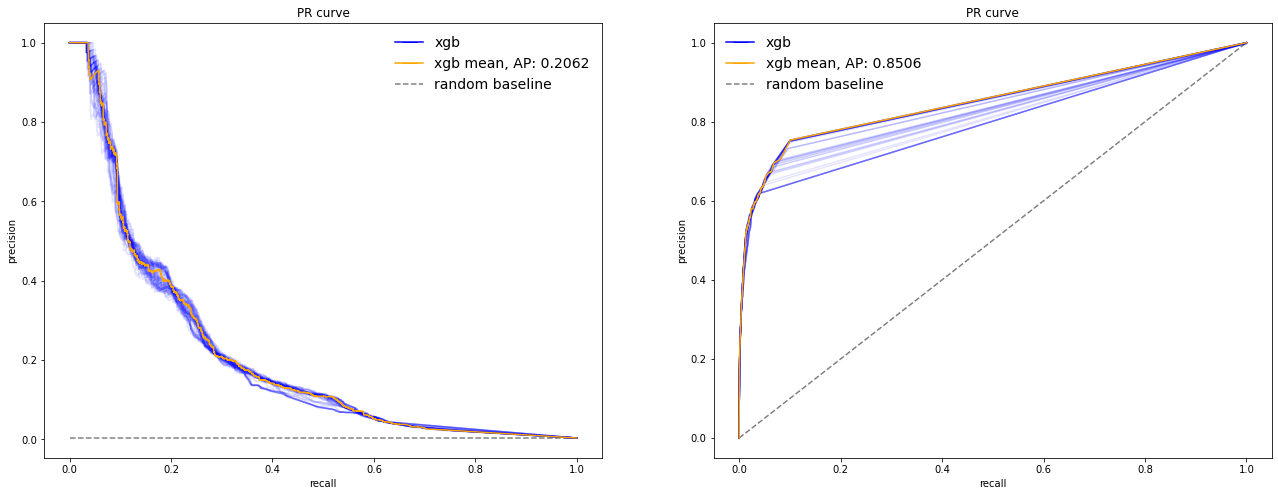

In [13]:
X_train, y_train, X_test, y_test = get_Xy_tt(local = True)

rf_pred_mean = np.array(rf_hp_df['test_preds_prob']).mean(axis = 0)
rf_pred_std = np.array(rf_hp_df['test_preds_prob']).std(axis = 0)

random_ap_base = (y_test>0).mean()
rf_mean_precision, rf_mean_recall, _ = metrics.precision_recall_curve(y_test, rf_pred_mean) 
rf_mean_AP = metrics.average_precision_score(y_test, rf_pred_mean)

rf_mean_fpr, rf_mean_tpr, _ =  metrics.roc_curve(y_test, rf_pred_mean) 
rf_mean_AUC = metrics.roc_auc_score(y_test, rf_pred_mean)

# -------------------------------------------------------------------------
# Fig
plt.figure(figsize = [22,8])

# ---------------------------------------------------------------------------
#PR/AP
plt.subplot(1,2,1)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.hlines(random_ap_base, 0, 1, linestyles='dashed', color = 'gray')

for i in rf_hp_df['PR']: 
    
    plt.plot(i[1], i[0], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_recall,rf_mean_precision, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AP:.4}')
random_ap_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_ap_line],frameon = False, fontsize = 14)


# ---------------------------------------------------------------------------
#ROC/AUC
plt.subplot(1,2,2)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

for i in rf_hp_df['ROC']: 
    
    plt.plot(i[0], i[1], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_fpr,rf_mean_tpr, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AUC:.4}')
random_auc_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_auc_line],frameon = False, fontsize = 14)

plt.show()


In [14]:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/preds_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/preds_df.pkl', 'rb')

df_merged = pickle.load(pkl_file)
pkl_file.close()

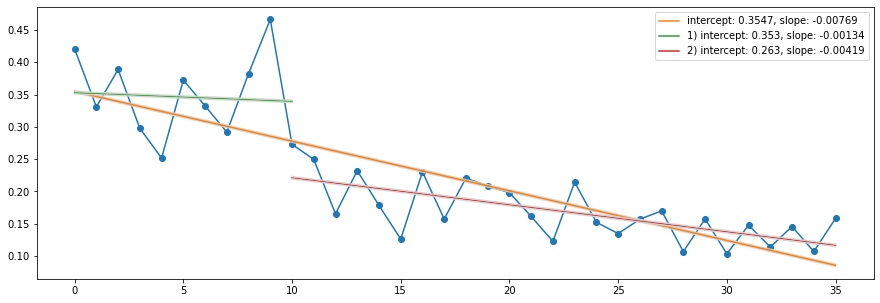

In [15]:
df_test = df_merged[df_merged['train'] == 0].copy()
df_test['pred_mean'] = rf_pred_mean
df_test['pred_std'] = rf_pred_std
df_test['y_binary'] = y_test

monthly_AP_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_AP = metrics.average_precision_score(monthly_subset['y_binary'], monthly_subset['pred_mean'])
    monthly_AP_list.append(monthly_AP)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_AP_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_AP_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_AP_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_AP_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

So this should be seen in tandem with the various lenght scales (from the test set).

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)
MSE: 0.0030533091551792845
MAE: 0.0039242805179020715


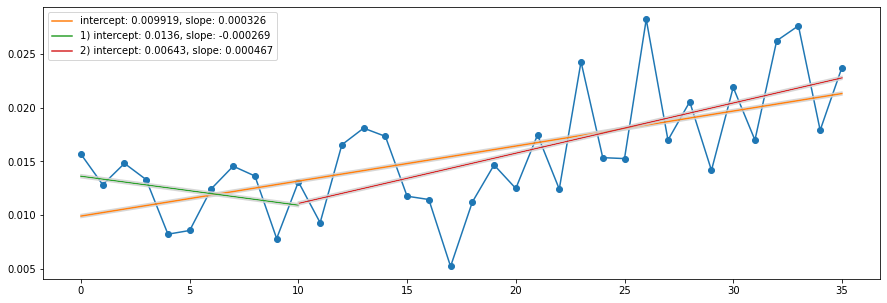

In [17]:
X_train_con, y_train_con, X_test_con, y_test_con = get_Xy_tt(local = True, binary_y= False)

rf_pred_con_mean = np.array(rf_hp_df['test_preds_con']).mean(axis = 0)
rf_pred_con_std = np.array(rf_hp_df['test_preds_con']).std(axis = 0)

rf_mean_MSE = metrics.mean_squared_error(y_test, rf_pred_con_mean)
rf_mean_MAE = metrics.mean_absolute_error(y_test, rf_pred_con_mean)
print(f'MSE: {rf_mean_MSE}')
print(f'MAE: {rf_mean_MAE}')


#df_test = df_merged[df_merged['train'] == 0].copy()
df_test['pred_con_mean'] = rf_pred_con_mean
df_test['pred_con_std'] = rf_pred_con_std
df_test['y_con'] = y_test_con

monthly_MSE_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_MSE = metrics.mean_squared_error(monthly_subset['y_con'], monthly_subset['pred_con_mean'])
    monthly_MSE_list.append(monthly_MSE)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_MSE_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_MSE_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_MSE_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_MSE_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

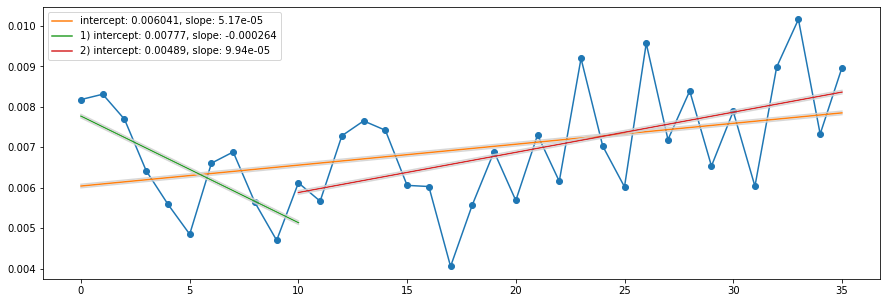

In [18]:

monthly_MAE_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_MAE = metrics.mean_absolute_error(monthly_subset['y_con'], monthly_subset['pred_con_mean'])
    monthly_MAE_list.append(monthly_MAE)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_MAE_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_MAE_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_MAE_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_MAE_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

In [19]:
# max-depth should be 6-8 (6,9).
# and try with min_leaf_sample 100-150 ish